In [1]:
import pandas as pd
import seaborn as sns

In [2]:
ca_df = pd.read_csv("marketing_customer_analysis_clean.csv")

In [3]:
ca_df.head(3)

,unnamed:_0,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,...,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type,month
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,A,2
1,1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,A,1
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2


In [4]:
ca_df = ca_df.drop(columns = ["unnamed:_0", "customer", "effective_to_date"])

In [5]:
categoricals = ca_df.select_dtypes(include=object)
numericals = ca_df.select_dtypes(include = 'number')

In [6]:
ordinals = categoricals[["coverage","education","vehicle_size"]]
nominals = categoricals.drop(columns=["coverage","education","vehicle_size"])

In [7]:
from sklearn.preprocessing import OrdinalEncoder

In [8]:
enc = OrdinalEncoder(categories=[["Premium", "Extended", "Basic"]])

ordinals["coverage"] = enc.fit_transform(ordinals[["coverage"]])

/var/folders/jj/y9r3z26d3g90cs_gnc5ptl640000gn/T/ipykernel_84058/2464240145.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ordinals["coverage"] = enc.fit_transform(ordinals[["coverage"]])


In [9]:
enc = OrdinalEncoder(categories=[["Doctor", "Master", "Bachelor", "College", "High School or Below"]])

ordinals["education"] = enc.fit_transform(ordinals[["education"]])

/var/folders/jj/y9r3z26d3g90cs_gnc5ptl640000gn/T/ipykernel_84058/392325911.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ordinals["education"] = enc.fit_transform(ordinals[["education"]])


In [10]:
enc = OrdinalEncoder(categories=[["Large", "Medsize", "Small"]])

ordinals["vehicle_size"] = enc.fit_transform(ordinals[["vehicle_size"]])

/var/folders/jj/y9r3z26d3g90cs_gnc5ptl640000gn/T/ipykernel_84058/2100830993.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ordinals["vehicle_size"] = enc.fit_transform(ordinals[["vehicle_size"]])


In [11]:
ordinals.head(3)

,coverage,education,vehicle_size
0,2.0,3.0,1.0
1,2.0,3.0,1.0
2,2.0,2.0,1.0


In [12]:
nominals.head(3)

,state,response,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_type
0,Arizona,No,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,A
1,California,No,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,A
2,Washington,No,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,A


In [13]:
nominals = pd.get_dummies(nominals, dtype=int)
nominals.head(3)

,state_Arizona,state_California,state_Nevada,state_Oregon,state_Washington,response_No,response_Yes,employmentstatus_Disabled,employmentstatus_Employed,employmentstatus_Medical Leave,...,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Four-Door Car,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_type_A
0,1,0,0,0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
1,0,1,0,0,0,1,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
2,0,0,0,0,1,1,0,0,1,0,...,0,1,0,0,0,0,1,0,0,1


In [14]:
categorical = pd.concat([ordinals,nominals], axis=1)
categorical.head(3)

,coverage,education,vehicle_size,state_Arizona,state_California,state_Nevada,state_Oregon,state_Washington,response_No,response_Yes,...,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Four-Door Car,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_type_A
0,2.0,3.0,1.0,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
1,2.0,3.0,1.0,0,1,0,0,0,1,0,...,0,1,0,1,0,0,0,0,0,1
2,2.0,2.0,1.0,0,0,0,0,1,1,0,...,0,1,0,0,0,0,1,0,0,1


In [15]:
final_df = pd.concat([numericals,ordinals,nominals], axis=1)
final_df.head(3)

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,month,coverage,...,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Four-Door Car,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_type_A
0,4809.216960,48029,61,7.0,52,0.0,9,292.800000,2,2.0,...,0,0,0,1,0,0,0,0,0,1
1,2228.525238,0,64,3.0,26,0.0,1,744.924331,1,2.0,...,0,1,0,1,0,0,0,0,0,1
2,14947.917300,22139,100,34.0,31,0.0,2,480.000000,2,2.0,...,0,1,0,0,0,0,1,0,0,1


### X-y split (y is the target variable, in this case, "total claim amount")

In [16]:
#cleaning data

In [17]:
final_df = final_df.dropna().drop_duplicates()
final_df.head(3)

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,month,coverage,...,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Four-Door Car,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_type_A
0,4809.216960,48029,61,7.0,52,0.0,9,292.800000,2,2.0,...,0,0,0,1,0,0,0,0,0,1
1,2228.525238,0,64,3.0,26,0.0,1,744.924331,1,2.0,...,0,1,0,1,0,0,0,0,0,1
2,14947.917300,22139,100,34.0,31,0.0,2,480.000000,2,2.0,...,0,1,0,0,0,0,1,0,0,1


In [18]:
#X-y split

In [19]:
y = final_df[["total_claim_amount"]]


In [20]:
X = final_df.drop("total_claim_amount", axis=1)

In [21]:
#train_test split

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)

In [24]:
y_test

,total_claim_amount
3173,432.408100
10693,511.200000
7780,325.395532
8135,480.578584
3382,1452.213743
...,...
9202,379.029102
9022,17.375878
6860,355.200000
7863,553.503610


In [25]:
#Standardize the data (after the data split!).


In [26]:
from sklearn.preprocessing import PowerTransformer

scaler = PowerTransformer()

In [27]:
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

array([[<Axes: title={'center': 'total_claim_amount'}>]], dtype=object)

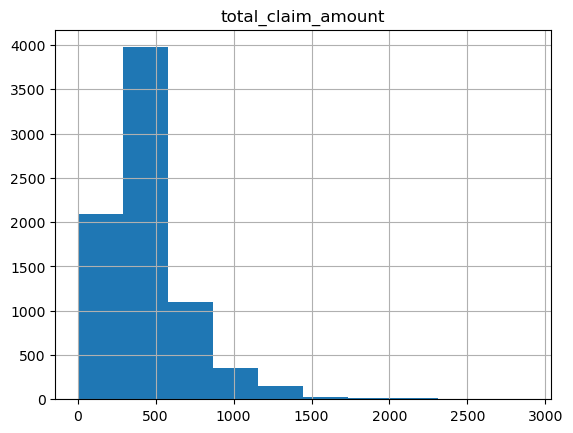

In [28]:
y_train.hist()

In [29]:
scaler.fit(y_train)

PowerTransformer()

In [30]:
y_train_scaled = scaler.transform(y_train)

In [31]:
y_test_scaled = scaler.transform(y_test)

In [32]:
#Model training

In [33]:
from sklearn.linear_model import Lasso,Ridge,ElasticNet,LinearRegression

<b> LinearRegression

In [34]:
lm = LinearRegression()
model = lm.fit(X_train_scaled,y_train)

In [35]:
model.coef_

array([[ 4.41118517e+00, -8.23082249e+00,  7.91079537e+01,
         5.17853072e+00, -1.70826212e+00, -3.40025896e+00,
        -1.11167242e+00,  4.21758772e-01, -2.48992789e+01,
         2.21556477e+00,  2.84499649e+00,  3.34207154e+14,
         4.19665647e+14,  2.52741818e+14,  3.89013920e+14,
         2.44638050e+14, -8.93903532e+14, -8.93903532e+14,
        -3.25793646e+14, -7.59132146e+14, -3.28440630e+14,
        -2.65680470e+14, -6.83479553e+14,  1.06089268e+15,
         1.06089268e+15,  1.08307303e+15,  1.30910944e+15,
         1.01863006e+15,  1.43552390e+13,  1.99731480e+13,
         1.80346527e+13, -2.21229006e+15, -1.02814696e+15,
        -1.10134885e+15,  1.30438740e+15,  1.67968419e+15,
         2.17731647e+15,  1.31171185e+15,  1.61139392e+15,
         1.84668415e+15,  6.07001832e+14,  9.30082990e+14,
         8.76245983e+14, -4.25579626e+14, -4.03235847e+14,
        -3.18998165e+14, -2.73325149e+14,  3.39097439e+15,
         3.12424835e+15,  2.75835585e+15,  2.48352593e+1

In [36]:
model.intercept_

array([435.15709931])

In [37]:
#create prediction for test set

In [38]:
y_pred = model.predict(X_test_scaled)

In [39]:
y_pred = pd.DataFrame(y_pred)

In [40]:
y_test = y_test.reset_index(drop=True)

In [41]:
resiudals_df = pd.concat([y_test,y_pred],axis=1)

In [42]:
residuals_df = resiudals_df.rename(columns={"total_claim_amount":"y_test", 0:"y_pred"})


In [43]:
residuals_df["residual"] = residuals_df["y_test"]-residuals_df["y_pred"]

In [44]:
residuals_df.head()

,y_test,y_pred,residual
0,432.408100,464.469599,-32.061499
1,511.200000,380.469599,130.730401
2,325.395532,227.500849,97.894683
3,480.578584,396.563349,84.015235
4,1452.213743,875.063349,577.150394


In [45]:
#Calculating metrics

In [46]:
mean_error = residuals_df["residual"].mean()
mean_error

2.865222980654765

In [47]:
from sklearn.metrics import mean_squared_error as mse , mean_absolute_error as mae

In [48]:
mse(y_test,y_pred)

21273.955911789875

In [49]:
mae(y_test,y_pred)

99.6957608685794

In [50]:
rmse = mse(y_test,y_pred, squared = False)
rmse

145.85594232594664

In [51]:
from sklearn.metrics import r2_score

In [52]:
#Computing R2_score for test_set

In [53]:
r2_score(y_test, y_pred)

0.7628338290552413

In [54]:
round(r2_score(y_test, y_pred),2)

0.76

In [55]:
#Computing R2_score for train_set

In [56]:
y_pred_train = pd.DataFrame(model.predict(X_train_scaled))

In [57]:
r2_score(y_train,y_pred_train)

0.7328286469360783

In [58]:
feature_names = list(X_train.columns)

In [59]:
coefficients = model.coef_

In [60]:
coefficients = [i for i in coefficients[0]]

In [61]:
fi_dict = {"name":feature_names,"coeff":coefficients}
fi_df = pd.DataFrame(fi_dict)
fi_df.head(3)

,name,coeff
0,customer_lifetime_value,4.411185
1,income,-8.230822
2,monthly_premium_auto,79.107954


<Axes: xlabel='coeff', ylabel='name'>

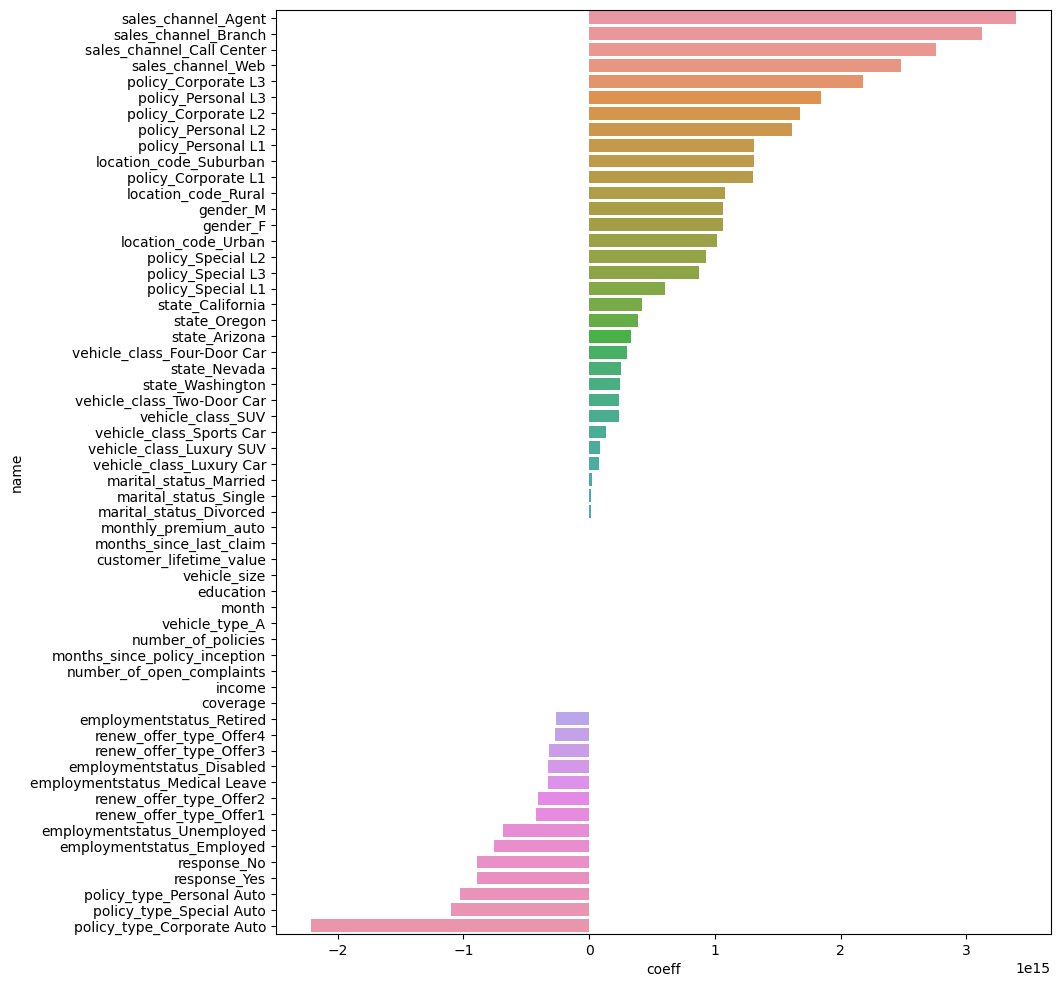

In [62]:
import matplotlib.pyplot as plt
fi_df = fi_df.sort_values(by='coeff', ascending=False)
plt.figure(figsize=(10,12))
sns.barplot(y= fi_df['name'], x = fi_df['coeff'])

<b> Lasso

In [63]:
model=Lasso(alpha=0)
model.fit(X_train, y_train)
print(f"{model.__class__.__name__}: Train -> {model.score(X_train, y_train)}, Test -> {model.score(X_test, y_test)}")


/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(


Lasso: Train -> 0.7627246205419637, Test -> 0.7952973104515613


/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.797e+07, tolerance: 6.572e+04 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


In [64]:
model=Lasso(alpha=0.1)
model.fit(X_train, y_train)
print(f"{model.__class__.__name__}: Train -> {model.score(X_train, y_train)}, Test -> {model.score(X_test, y_test)}")


Lasso: Train -> 0.762653095915273, Test -> 0.7954650387781518


In [65]:
model=Lasso(alpha=10000)
model.fit(X_train, y_train)
print(f"{model.__class__.__name__}: Train -> {model.score(X_train, y_train)}, Test -> {model.score(X_test, y_test)}")


Lasso: Train -> 0.18868322970220153, Test -> 0.17674104115665146


<b> Ridge

In [66]:
model=Ridge(alpha=0)
model.fit(X_train, y_train)
print(f"{model.__class__.__name__}: Train -> {model.score(X_train, y_train)}, Test -> {model.score(X_test, y_test)}")


Ridge: Train -> 0.7627245827840464, Test -> 0.7953061203400933


In [67]:
model=Ridge(alpha=0.1)
model.fit(X_train, y_train)
print(f"{model.__class__.__name__}: Train -> {model.score(X_train, y_train)}, Test -> {model.score(X_test, y_test)}")


Ridge: Train -> 0.7627246187951044, Test -> 0.7952986591903561


In [68]:
model=Ridge(alpha=10000)
model.fit(X_train, y_train)
print(f"{model.__class__.__name__}: Train -> {model.score(X_train, y_train)}, Test -> {model.score(X_test, y_test)}")


Ridge: Train -> 0.5970660610833052, Test -> 0.6322921306027105


#### Define a function that takes a list of models and trains (and tests) them so we can try a lot of them without repeating code.


In [72]:
list_of_models = [LinearRegression(), Lasso(alpha=100), Ridge(alpha=0.1)]
def train_and_test_models(list_of_models,X, y, random_state=42):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=random_state)
    for model in list_of_models:
        model.fit(X_train, y_train)
        train_accuracy = model.score(X_train, y_train)
        test_accuracy = model.score(X_test, y_test)
        print(f"{model}: Train -> {train_accuracy}, Test -> {test_accuracy}")

In [73]:
train_and_test_models(list_of_models, X, y)

LinearRegression(): Train -> 0.7627246205419637, Test -> 0.7952973104515614
Lasso(alpha=100): Train -> 0.5117024069389362, Test -> 0.5493096378375883
Ridge(alpha=0.1): Train -> 0.7627246187951044, Test -> 0.7952986591903561


#### Use feature selection techniques (P-Value, RFE) to select a subset of features to train the model with (if necessary).

In [81]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE  ## recursive feature elemination technique
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

X_train = X_train.select_dtypes(include=np.number)
X_test  = X_test.select_dtypes(include=np.number)

X_train = pd.DataFrame(X_train, columns=X.columns)
X_test  = pd.DataFrame(X_test, columns=X.columns)

#X_train.isna().sum()
nulls = pd.DataFrame(X_train.isna().sum()).reset_index()
#nulls.head()
nulls.columns = ['Column','nas']
#nulls.head()
#nulls[nulls['nas'] > 0].head()
cols_to_drop = nulls[nulls['nas'] > 0]['Column'] # Too drastic, but made on pourpose for quick filtering (don't do this in production!!)

X_train.drop(columns=cols_to_drop, axis=1, inplace = True)
X_test.drop(columns=cols_to_drop, axis=1, inplace = True)

#display(X_train)

lm = LinearRegression()

selector = RFE(lm, n_features_to_select= 20, step = 6, verbose = 1) # Step is how many features to add or drop everytime
selector.fit(X_train, y_train)

kept_features = selector.get_support(indices = True) #returns an array of integers corresponding to nonremoved features
kept_features = list(X_train.iloc[:,kept_features].columns)

X_train = selector.transform(X_train)
X_test  = selector.transform(X_test)

X_train = pd.DataFrame(X_train, columns=kept_features)
X_test  = pd.DataFrame(X_test, columns=kept_features)

print("Final selected features: ")
display(X_train)

Fitting estimator with 58 features.
Fitting estimator with 52 features.
Fitting estimator with 46 features.
Fitting estimator with 40 features.
Fitting estimator with 34 features.
Fitting estimator with 28 features.
Fitting estimator with 22 features.
Final selected features: 


,location_code_Rural,location_code_Suburban,location_code_Urban,marital_status_Divorced,policy_type_Corporate Auto,policy_type_Personal Auto,policy_type_Special Auto,policy_Special L1,policy_Special L2,policy_Special L3,renew_offer_type_Offer1,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,vehicle_class_Four-Door Car,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8236,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8237,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
8238,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8239,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


## Correlation matrix

In [87]:
import statsmodels.api as sm
# Fit an ordinary least squares (OLS) model
model = sm.OLS(final_df['total_claim_amount'], final_df)
results = model.fit()
# Get p-values for each feature
p_values = results.pvalues
# Set a significance level (e.g., 0.05)
alpha = 0.05

# Filter features based on p-value
significant_features = p_values[p_values < alpha].index

# Display significant features
print("Significant Features:")
print(significant_features)

Significant Features:
Index(['customer_lifetime_value', 'income', 'total_claim_amount'], dtype='object')


In [88]:
final_df_subset_p_value = final_df[significant_features]
final_df_subset_p_value 

,customer_lifetime_value,income,total_claim_amount
0,4809.216960,48029,292.800000
1,2228.525238,0,744.924331
2,14947.917300,22139,480.000000
3,22332.439460,49078,484.013411
4,9025.067525,23675,707.925645
...,...,...,...
10905,15563.369440,0,1214.400000
10906,5259.444853,61146,273.018929
10907,23893.304100,39837,381.306996
10908,11971.977650,64195,618.288849


In [89]:
#P-Value Using func
def feature_selection_pvalue(X, y, significance_level=0.05):
    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()
    p_values = model.pvalues[1:]  # Exclude the constant term
    selected_features = X.columns[1:][p_values < significance_level]
    return selected_features
# Use case:
selected_features_pvalue = feature_selection_pvalue(X, y)
# Print or display the selected features
print("Selected Features based on P-value:")
print(selected_features_pvalue)

Selected Features based on P-value:
Index(['income', 'monthly_premium_auto', 'months_since_last_claim', 'coverage',
       'education', 'state_Arizona', 'state_California', 'state_Oregon',
       'response_Yes', 'employmentstatus_Disabled',
       'employmentstatus_Employed', 'employmentstatus_Retired',
       'employmentstatus_Unemployed', 'gender_F', 'gender_M',
       'location_code_Rural', 'location_code_Suburban', 'location_code_Urban',
       'marital_status_Divorced', 'marital_status_Married',
       'marital_status_Single', 'policy_type_Corporate Auto',
       'policy_type_Personal Auto', 'policy_Personal L2', 'policy_Personal L3',
       'policy_Special L1', 'renew_offer_type_Offer1',
       'renew_offer_type_Offer3', 'renew_offer_type_Offer4',
       'sales_channel_Agent', 'sales_channel_Branch',
       'sales_channel_Call Center', 'sales_channel_Web', 'vehicle_class_SUV',
       'vehicle_class_Sports Car', 'vehicle_type_A'],
      dtype='object')
